In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import json
sys.path.append('/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/')
#from src.utils.logger_functions import console
from src.cmos_plotter.Latency_calculator import *
from src.utils.logger_functions import console
from src.utils.metadata_functions import load_metadata_as_dataframe
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [9]:
MAIN_PATH = '/itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Neurons_As_DNNs/3_Processed_Data/March2025_heart'
PROCESSED_DATA_PATH = os.path.join(MAIN_PATH, f'Sorters_stimulation/250415_stimulation')
OUTPUT_PATH = os.path.join(MAIN_PATH,f'Latency_plots/Temp')
if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)

filename = 'ID2184_7_DIV32_DATE20250415_1207_spontaneous_Freq_variation_try_2_0.raw.h5'

SORTER_PATH = PROCESSED_DATA_PATH
FULL_SORTER_PATH = os.path.join(SORTER_PATH,'Sorter_'+filename)
PAIRINGS_PATH = os.path.join(MAIN_PATH, f'biTE_stimulation/250415_stimulation/Full_files')


In [4]:
#open pickle file
import pickle
with open(os.path.join(MAIN_PATH, 'biTE_stimulation/Full_dataset/CSVs/validated_results_full_data_w_speed_and_firing.pkl'), 'rb') as f:
    pairings = pickle.load(f)

In [10]:
pairings[pairings['filename'] == f"{filename[:-3]}_processed_info_metrics.pkl"]

,source_electrode,target_electrode,source_unit_id,target_unit_id,lag,validation,mTE,syn probability,latency_extremum,electrodes_source_unit,...,source_firing_rate,target_firing_rate,source_isi_mean,target_isi_mean,source_isi_median,target_isi_median,source_isi_std,target_isi_std,source_isi_cv,target_isi_cv
23505,654,1531,92,55,5.0,good,0.001575,0.558468,"[[0, 187.25, 0.0, input], [0, 191.75, 4.5, out...","[1095, 1534, 2194, 872, 2634, 2411, 1754, 1531...",...,1.722815,1.251472,581.617879,801.285097,285.6,474.8,993.733424,1150.554578,1.708568,1.435887
23506,873,1531,96,55,2.0,good,0.000737,0.141576,"[[0, 145.1, 0.0, input], [1, 303.65, 0.0, inpu...","[4173, 4613, 1534, 2194, 6154, 872, 3514, 3072...",...,5.384806,1.251472,185.826763,801.285097,99.7,474.8,420.909925,1150.554578,2.265066,1.435887
23512,654,873,92,96,3.0,good,0.005442,0.719758,"[[0, 187.25, 0.0, input], [1, 1203.65, 0.0, in...","[1095, 1534, 2194, 872, 2634, 2411, 1754, 1531...",...,1.722815,5.384806,581.617879,185.826763,285.6,99.7,993.733424,420.909925,1.708568,2.265066
23523,1531,19569,78,44,4.0,good,0.003139,0.093255,"[[0, 40.050000000000004, 0.0, input], [1, 68.0...","[5712, 3512, 3731, 4831, 5272, 872, 3510, 3072...",...,5.882016,0.747278,170.109507,1344.47277,95.05,296.2,350.367273,2770.496965,2.059657,2.060657
23547,1531,2191,78,67,5.0,good,0.001469,0.154839,"[[0, 40.050000000000004, 0.0, input], [1, 68.0...","[5712, 3512, 3731, 4831, 5272, 872, 3510, 3072...",...,5.882016,5.767456,170.109507,173.490756,95.05,78.775,350.367273,290.362275,2.059657,1.673647
23558,1531,4831,78,74,1.0,good,0.003865,0.229912,"[[0, 40.050000000000004, 0.0, input], [1, 68.0...","[5712, 3512, 3731, 4831, 5272, 872, 3510, 3072...",...,5.882016,2.919732,170.109507,342.903499,95.05,159.4,350.367273,545.78984,2.059657,1.591672
23561,4831,4831,69,74,1.0,good,0.000168,0.273720,"[[0, 501.15, 0.0, input], [1, 738.1, 0.0, inpu...","[4828, 2405, 3512, 3731, 4831, 5272, 872, 3510...",...,5.06077,2.919732,197.733367,342.903499,113.8,159.4,353.051153,545.78984,1.785491,1.591672
23563,4831,2634,69,76,3.0,good,0.000900,0.087372,"[[0, 501.15, 0.0, input], [1, 738.1, 0.0, inpu...","[4828, 2405, 3512, 3731, 4831, 5272, 872, 3510...",...,5.06077,1.563411,197.733367,641.048667,113.8,510.4,353.051153,515.415445,1.785491,0.804019
23584,4829,4829,61,75,1.0,good,0.003147,0.238889,"[[0, 533.55, 0.0, input], [1, 612.349999999999...","[12306, 7909, 5488, 5709, 4828, 5270, 5708, 61...",...,3.730399,1.54562,268.316265,648.443371,153.05,594.75,292.279367,592.465484,1.089309,0.913673
23588,4829,4829,61,35,1.0,good,0.000787,0.088889,"[[0, 533.55, 0.0, input], [1, 612.349999999999...","[12306, 7909, 5488, 5709, 4828, 5270, 5708, 61...",...,3.730399,3.850315,268.316265,259.952336,153.05,87.45,292.279367,340.033604,1.089309,1.308061


In [9]:
data = np.load(os.path.join(PROCESSED_DATA_PATH, f'{filename[:-3]}_processed.pkl'), allow_pickle=True)
spikes_extremum = pd.DataFrame(data['SPIKEMAT_EXTREMUM'])
spikes = np.array([[int(row[0]), float(row[1]), float(row[2])] for row in data['SPIKEMAT']])
a = 0
FULL_SORTER_PATH = os.path.join(SORTER_PATH,'Sorter_'+filename)
area = filename.split('_')[1]
# Open the file in binary mode
sys.modules['numpy.rec'] = np.rec
#with open(os.path.join(PAIRINGS_PATH, f'{filename[:-3]}_processed_info_metrics.pkl'), 'rb') as f:
#    data_te = np.array(pickle.load(f))
data_te = np.load(os.path.join(PAIRINGS_PATH, f'{filename[:-3]}_processed_info_metrics.pkl'), allow_pickle=True)
if 'validated_results' in data_te.keys():
    console.info(f'Pairs from {filename} were already validated')
if a ==0:
    exp_duration = data_te['EXPERIMENT_DURATION']
    te_unit_pairs = pd.DataFrame(data_te['mTE'])
    pairings = te_unit_pairs
    

    with open(os.path.join(FULL_SORTER_PATH, 'wf_folder_curated/sparsity.json'), 'r') as file:
        sorting_info = json.load(file)

    unit_ids = sorting_info['unit_ids']

    spikes, electrodes_pre_all, electrodes_post_all, pre_extremum_all, post_extremum_all, unit_pre_all, unit_post_all, lag_all = get_electrode_unit_info_te(data, pairings, area, unit_ids)

2025-05-20 15:58:04,409 Pairs from ID2184_7_DIV32_DATE20250415_1207_spontaneous_Freq_variation_try_2.raw.h5 were already validated


93 15
['7473']
56 15
['7473']
70 29
['1745']
3 29
['1745']
97 39
['10107']
3 58
['11866']
15 58
['11866']
73 60
['2191']
56 60
['2191']
34 70
['12308']
7 70
['12308']
96 74
['4608']
97 74
['4608']
15 75
['4613']
15 77
['873']
52 22
['23311']
15 22
['23311']
56 22
['23311']
71 72
['2191']
96 72
['2191']
70 72
['2191']
96 83
['2630']
64 83
['2630']
92 93
['873']
59 93
['873']
83 93
['873']
53 93
['873']
95 97
['13407']
7 98
['12750']
68 18
['19354']
85 18
['19354']
71 18
['19354']
93 18
['19354']
68 24
['21329']
7 24
['21329']
71 48
['2411']
15 48
['2411']
84 48
['2411']
25 48
['2411']
92 54
['872']
12 54
['872']
71 54
['872']
7 59
['4829']
7 64
['22867']
74 64
['22867']
73 64
['22867']
92 73
['4829']
7 73
['4829']
7 81
['2845']
70 82
['1745']
7 82
['1745']
93 85
['4831']
71 85
['4831']
32 85
['4831']
15 92
['654']
59 92
['654']
49 92
['654']
92 3
['16051']
54 3
['16051']
60 3
['16051']
93 3
['16051']
8 7
['1745']
74 7
['1745']
25 78
['2634']
81 78
['2634']
85 78
['2634']
24 26
['23308']

In [4]:
data_te['validated_results'] = pd.DataFrame(data_te['validated_results'])
res_before = data_te['validated_results'][data_te['validated_results']['validation'] == 'good']
#order res from max syn probability to min
res_before = res_before.sort_values(by='syn probability', ascending=False)
res_before

,source_electrode,target_electrode,source_unit_id,target_unit_id,lag,latency_extremum,validation,mTE,local_mTE,syn probability
92,654,872,101,104,4.0,"[[0, 754.15, 0.0, input], [0, 758.15, 4.0, out...",good,0.014708,"[[0.0021329892783350035], [0.00213298927833500...",0.980736
40,1745,22867,47,35,5.0,"[[0, 178.60000000000002, 0.0, input], [1, 298....",good,0.008869,"[[0.0021132602230951804], [0.00211326022309518...",0.874728
61,654,16051,101,3,9.0,"[[0, 754.15, 0.0, input], [1, 1334.5, 0.0, inp...",good,0.000298,"[[4.097925434419432e-05], [4.097925434419432e-...",0.872154
41,1745,22867,50,35,4.0,"[[0, 1449.35, 0.0, input], [0, 1453.8, 4.45, o...",good,0.003005,"[[0.0006629237278524919], [0.00066292372785249...",0.868966
60,872,16051,104,3,5.0,"[[0, 758.15, 0.0, input], [1, 1338.6, 0.0, inp...",good,0.001729,"[[0.0002768585192941664], [0.00027685851929416...",0.800979
90,7473,873,16,103,4.0,"[[0, 219.25, 0.0, input], [0, 223.399999999999...",good,0.011979,"[[0.0024154719293176486], [0.00241547192931764...",0.448524
26,651,2191,63,67,5.0,"[[0, 614.25, 0.0, input], [1, 778.3, 0.0, inpu...",good,0.001524,"[[0.0004471441679958799], [0.00044714416799587...",0.346856
137,4829,4829,79,78,2.0,"[[0, 204.1, 0.0, input], [1, 334.25, 0.0, inpu...",good,0.003498,"[[0.0010398515206396157], [0.00103985152063961...",0.298661
85,13407,4608,99,93,2.0,"[[0, 366.25, 0.0, input], [1, 441.5, 0.0, inpu...",good,0.008488,"[[0.0023285531166091747], [0.00232855311660917...",0.270492
18,4829,4829,79,95,1.0,"[[0, 204.1, 0.0, input], [1, 334.25, 0.0, inpu...",good,0.001834,"[[0.0005489432015642617], [0.00054894320156426...",0.189495


In [10]:
data_te['validated_results'] = pd.DataFrame(data_te['validated_results'])
res_after = data_te['validated_results'][data_te['validated_results']['validation'] == 'good']
#order res from max syn probability to min
res_after = res_after.sort_values(by='syn probability', ascending=False)
res_after

,source_electrode,target_electrode,source_unit_id,target_unit_id,lag,latency_extremum,validation,mTE,local_mTE,syn probability
39,654,872,92,54,4.0,"[[0, 840.9, 0.0, input], [0, 845.3000000000001...",good,0.012021,"[[0.0018015175578105311], [0.00180151755781053...",0.918860
57,654,16051,92,3,9.0,"[[0, 840.9, 0.0, input], [0, 850.3, 9.4, outpu...",good,0.001583,"[[0.00017718217565993623], [0.0001771821756599...",0.899123
58,872,16051,54,3,5.0,"[[0, 845.3000000000001, 0.0, input], [0, 850.3...",good,0.000253,"[[3.53889881931954e-05], [3.53889881931954e-05...",0.896074
18,651,2191,71,72,4.0,"[[0, 1109.0, 0.0, input], [1, 2075.6, 0.0, inp...",good,0.003443,"[[0.0008843490594945001], [0.00088434905949450...",0.558190
82,4608,2634,25,53,3.0,"[[0, 73.3, 0.0, input], [0, 76.6, 3.3, output]...",good,0.001938,"[[0.00040072380567879713], [0.0004007238056787...",0.439086
43,1745,22867,7,64,5.0,"[[0, 934.6, 0.0, input], [1, 1014.3, 0.0, inpu...",good,0.003645,"[[0.0007988117605331929], [0.00079881176053319...",0.302158
14,7473,873,15,77,4.0,"[[0, 163.0, 0.0, input], [1, 257.25, 0.0, inpu...",good,0.006603,"[[0.001288466283357924], [0.001288466283357924...",0.301449
23,654,873,92,93,3.0,"[[0, 840.9, 0.0, input], [1, 1293.0, 0.0, inpu...",good,0.001259,"[[0.0004409617171894512], [0.00044096171718945...",0.265351
29,1531,19354,68,18,4.0,"[[0, 212.29999999999998, 0.0, input], [1, 878....",good,0.003285,"[[0.0007407029858629244], [0.00074070298586292...",0.248756
76,7473,2194,15,49,4.0,"[[0, 163.0, 0.0, input], [1, 257.25, 0.0, inpu...",good,0.002077,"[[0.0005920765796675509], [0.00059207657966755...",0.217391


In [6]:
unit_post_all.index(19)
#unit_pre_all[21]

64

In [12]:
unit_pre = 68
idx = unit_pre_all.index(unit_pre)
idx, unit_post_all[idx]

(29, 18)

In [13]:
idx = 29
unit_pre = unit_pre_all[idx]
unit_post = unit_post_all[idx]
pre_extremum = pre_extremum_all[idx]
post_extremum = post_extremum_all[idx]
lag = lag_all[idx]
unit_to_el = data_te['UNIT_TO_EL']

print(f'Pair {idx} pre {unit_pre} post {unit_post} lag {lag} pre_extremum {pre_extremum} post_extremum {post_extremum}')
lat_after = plot_latency_and_location_with_extremum_both_plots(OUTPUT_PATH, filename, lag, exp_duration, unit_to_el, pre_extremum, post_extremum, unit_pre, unit_post, unit_ids, spikes, spikes_extremum, extremum_output = post_extremum)

Pair 29 pre 68 post 18 lag 4.0 pre_extremum [1531] post_extremum [19354]


2025-05-20 15:58:33,877 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-05-20 15:58:33,984 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-05-20 15:58:33,985 Writing TrueType font.


In [27]:
pre_extremum, post_extremum

([18624], [8723])

In [28]:
plot_latency_and_location_simple_both_plots(OUTPUT_PATH, filename, unit_to_el, pre_extremum, post_extremum, unit_pre, unit_post, spikes)


2025-05-02 09:39:49,954 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-05-02 09:39:50,062 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-05-02 09:39:50,062 Writing TrueType font.


In [133]:

for idx in range(len(unit_pre_all)):
    unit_pre = unit_pre_all[idx]
    unit_post = unit_post_all[idx]
    pre_extremum = pre_extremum_all[idx]
    post_extremum = post_extremum_all[idx]
    lag = lag_all[idx]
    unit_to_el = data_te['UNIT_TO_EL']

    #print(f'Pair {idx} pre {unit_pre} post {unit_post} lag {lag} pre_extremum {pre_extremum} post_extremum {post_extremum}')
    lat = plot_latency_and_location_with_extremum_both_plots(OUTPUT_PATH, filename, lag, exp_duration, unit_to_el, pre_extremum, post_extremum, unit_pre, unit_post, unit_ids, spikes, spikes_extremum, extremum_output = post_extremum)

2025-04-17 17:58:34,338 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-04-17 17:58:34,447 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-04-17 17:58:34,447 Writing TrueType font.
2025-04-17 17:58:35,384 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-04-17 17:58:35,491 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-04-17 17:58:35,491 Writing TrueType font.
2025-04-17 17:58:36,240 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-04-17 17:58:36,347 Embedding font /home/kvuli

In [2]:
MAIN_PATH = '/itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Neurons_As_DNNs/3_Processed_Data/Nonos_synaptic_blockers'

In [3]:
OUTPUT_PATH = os.path.join(MAIN_PATH,f'Latency_plots/Temp')

In [79]:
area = 3
a=0
#PROCESSED_DATA_PATH = os.path.join(MAIN_PATH, 'Full_firing_files')
#PAIRINGS_PATH = os.path.join(MAIN_PATH, 'Full_files')
PROCESSED_DATA_PATH = os.path.join(MAIN_PATH, 'Sorters')
PAIRINGS_PATH = os.path.join(MAIN_PATH, 'biTE_new')
#filename = f'ID2184_3_DIV46_DATE20250429_1215_spontaneous_FreqVarDel0V2_.raw.h5'
#filename_after = f'ID2184_3_DIV46_DATE20250429_1206_spontaneous_FreqVarDel0V2_.raw.h5'
#filename_week_after = f'ID2184_3_DIV46_DATE20250429_1215_spontaneous_FreqVarDel0V2__0.raw.h5'
filename = f'ID1851_N0_DIV100_DATE20240530_1342_spontaneous_.raw.h5' 
filename_after = f'ID1851_N0_DIV100_DATE20240530_1407_spontaneous_.raw.h5'
filename_after_2 = f'ID1851_N0_DIV100_DATE20240530_1413_spontaneous_.raw.h5'
filename_week_after = f'ID1851_N0_DIV107_DATE20240606_1123_spontaneous_week_after_synapse_inhibiton.raw.h5'

data = np.load(os.path.join(PROCESSED_DATA_PATH, f'{filename[:-3]}_processed.pkl'), allow_pickle=True)
spikes = np.array([[int(row[0]), float(row[1]), float(row[2])] for row in data['SPIKEMAT']])
spikes_extremum = pd.DataFrame(data['SPIKEMAT_EXTREMUM'])

data_after = np.load(os.path.join(PROCESSED_DATA_PATH, f'{filename_after[:-3]}_processed.pkl'), allow_pickle=True)
spikes_after = np.array([[int(row[0]), float(row[1]), float(row[2])] for row in data_after['SPIKEMAT']])
data_after_2 = np.load(os.path.join(PROCESSED_DATA_PATH, f'{filename_after_2[:-3]}_processed.pkl'), allow_pickle=True)
spikes_after_2 = np.array([[int(row[0]), float(row[1]), float(row[2])] for row in data_after_2['SPIKEMAT']])
data_week_after = np.load(os.path.join(PROCESSED_DATA_PATH, f'{filename_week_after[:-3]}_processed.pkl'), allow_pickle=True)
spikes_week_after = np.array([[int(row[0]), float(row[1]), float(row[2])] for row in data_week_after['SPIKEMAT']])


FULL_SORTER_PATH = os.path.join(PROCESSED_DATA_PATH,'Sorter_'+filename)
area = filename.split('_')[1]
# Open the file in binary mode
sys.modules['numpy.rec'] = np.rec
#with open(os.path.join(PAIRINGS_PATH, f'{filename[:-3]}_processed_info_metrics.pkl'), 'rb') as f:
#    data_te = np.array(pickle.load(f))
data_te = np.load(os.path.join(PAIRINGS_PATH, f'{filename[:-3]}_processed_info_metrics.pkl'), allow_pickle=True)
if 'validated_results' in data_te.keys():
    console.info(f'Pairs from {filename} were already validated')
if a ==0:
    exp_duration = data_te['EXPERIMENT_DURATION']
    te_unit_pairs = pd.DataFrame(data_te['mTE'])
    pairings = te_unit_pairs
    

    with open(os.path.join(FULL_SORTER_PATH, 'wf_folder_curated/sparsity.json'), 'r') as file:
        sorting_info = json.load(file)

    unit_ids = sorting_info['unit_ids']
    #unit_ids = data_te['UNIT_IDS']

    spikes, electrodes_pre_all, electrodes_post_all, pre_extremum_all, post_extremum_all, unit_pre_all, unit_post_all, lag_all = get_electrode_unit_info_te(data, pairings, area, unit_ids)

2025-05-09 10:37:42,055 Pairs from ID1851_N0_DIV100_DATE20240530_1342_spontaneous_.raw.h5 were already validated


0 4
['14339']
14 4
['14339']
4 6
['1357']
36 6
['1357']
45 6
['1357']
17 13
['17020']
4 15
['7518']
18 15
['7518']
28 15
['7518']
30 17
['1392']
4 18
['5318']
15 18
['5318']
6 18
['5318']
4 19
['1603']
15 19
['1603']
45 19
['1603']
37 20
['10608']
46 39
['3353']
40 39
['3353']
45 39
['3353']
15 49
['6198']
0 49
['6198']
33 5
['9759']
35 9
['1614']
29 9
['1614']
36 9
['1614']
16 10
['1614']
9 10
['1614']
28 11
['14800']
32 11
['14800']
36 14
['1603']
44 14
['1603']
12 14
['1603']
1 16
['4473']
27 16
['4473']
1 21
['22071']
28 21
['22071']
13 27
['7993']
35 27
['7993']
5 28
['9736']
40 28
['9736']
38 28
['9736']
22 29
['21177']
40 29
['21177']
46 29
['21177']
1 30
['2259']
28 30
['2259']
39 32
['21633']
16 33
['4007']
1 33
['4007']
33 35
['2259']
1 35
['2259']
39 35
['2259']
22 36
['3355']
46 36
['3355']
45 36
['3355']
33 37
['10608']
1 37
['10608']
46 38
['2035']
46 40
['3355']
45 40
['3355']
38 40
['3355']
39 41
['11054']
40 41
['11054']
46 41
['11054']
27 44
['20303']
38 44
['20303']


In [80]:
res = data_te['validated_results']
type(res[31])

dict

In [81]:
unit_pre = 37
unit_post = 20
indices_pre = [i for i, value in enumerate(unit_pre_all) if value == unit_pre]
indices_post = [i for i, value in enumerate(unit_post_all) if value == unit_post]
common_indices = list(set(indices_pre).intersection(indices_post))
idx = common_indices[0]
print(idx)
pre_extremum = pre_extremum_all[idx]
post_extremum = post_extremum_all[idx]
lag = lag_all[idx]
unit_to_el = data_te['UNIT_TO_EL']
print(pre_extremum, post_extremum, lag, unit_pre, unit_post)

16
[10608] [10608] 1.0 37 20


In [194]:
OUTPUT_PATH = os.path.join(MAIN_PATH,f'Latency_plots/Temp')
if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)

In [83]:
lat = plot_latency_and_location_with_extremum_both_plots(OUTPUT_PATH, filename, lag, exp_duration, unit_to_el, pre_extremum, post_extremum, unit_pre, unit_post, unit_ids, spikes, spikes_extremum, extremum_output = post_extremum)

2025-05-09 10:37:43,418 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-05-09 10:37:43,525 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-05-09 10:37:43,525 Writing TrueType font.


In [84]:

latency_before = plot_latency_and_location_simple_both_plots(OUTPUT_PATH, filename, unit_to_el, pre_extremum, post_extremum, unit_pre, unit_post, spikes)

2025-05-09 10:37:44,355 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-05-09 10:37:44,457 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-05-09 10:37:44,458 Writing TrueType font.


2025-05-09 10:37:44,942 locator: <matplotlib.ticker.AutoLocator object at 0x7fb68409add0>


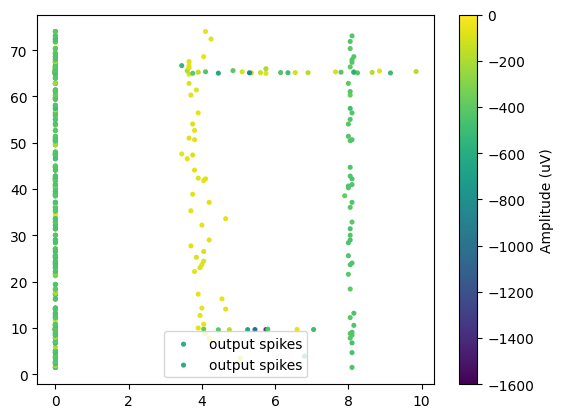

In [85]:

gain = 6.3

output_spikes = spikes[spikes[:, 0] == pre_extremum[0]]
output_before_amplitude_color = np.zeros(latency_before.shape[0], dtype=[('latency', 'f8'), ('spike time', 'f8'), ('amplitude', 'f8'), ('category', 'U10')])
output_before_amplitude_color['latency'] = latency_before['latency']
output_before_amplitude_color['spike time'] = latency_before['spike time'] /1000
output_before_amplitude_color['category'] = latency_before['category']
output_before_amplitude_color['amplitude'] = (np.array([output_spikes[output_spikes[:, 1] == spike_time, 2][0] for spike_time in latency_before['spike time']])*gain).tolist()
#remove all rows in latency_before where amplitude is > 1000
#output_before_amplitude_color = output_before_amplitude_color[output_before_amplitude_color['amplitude'] > -500]
output_before_amplitude_color = output_before_amplitude_color[((output_before_amplitude_color['category'] == 'input') & (output_before_amplitude_color['amplitude'] < -200) & (output_before_amplitude_color['amplitude'] > -700)) | (output_before_amplitude_color['category'] == 'output')]
#plot the output_before_amplitude_color with amplitude as color
output_only = output_before_amplitude_color[output_before_amplitude_color['category'] == 'output']
input_only = output_before_amplitude_color[output_before_amplitude_color['category'] == 'input']
scatter_2 = plt.scatter(
    output_only['latency'], 
    output_only['spike time'], 
    s=7, 
    c=output_only['amplitude'], 
    cmap='viridis', 
    vmin=-1600,  # Set minimum value for color scale
    vmax=0,      # Set maximum value for color scale
    label='output spikes'
)
scatter = plt.scatter(
    input_only['latency'], 
    input_only['spike time'], 
    s=7, 
    c=input_only['amplitude'], 
    cmap='viridis', 
    vmin=-1600,  # Set minimum value for color scale
    vmax=0,      # Set maximum value for color scale
    label='output spikes'
)





# Add colorbar using the same scatter object
cbar = plt.colorbar(scatter)
cbar.set_label('Amplitude (uV)')
plt.legend()

In [72]:
latency_after = plot_latency_and_location_simple_both_plots(OUTPUT_PATH, filename_after, unit_to_el, pre_extremum, post_extremum, unit_pre, unit_post, spikes_after)

2025-05-09 10:36:37,453 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-05-09 10:36:37,555 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-05-09 10:36:37,556 Writing TrueType font.


2025-05-09 10:38:09,858 locator: <matplotlib.ticker.AutoLocator object at 0x7fb67caebf50>


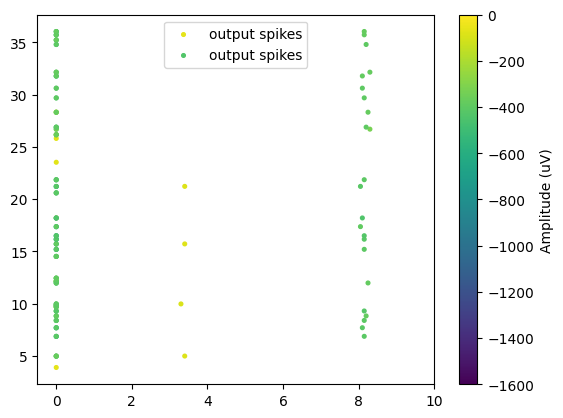

In [87]:

gain = 6.3
spikes = spikes_after
latency_before = latency_after

output_spikes = spikes[spikes[:, 0] == pre_extremum[0]]
output_before_amplitude_color = np.zeros(latency_before.shape[0], dtype=[('latency', 'f8'), ('spike time', 'f8'), ('amplitude', 'f8'), ('category', 'U10')])
output_before_amplitude_color['latency'] = latency_before['latency']
output_before_amplitude_color['spike time'] = latency_before['spike time'] /1000
output_before_amplitude_color['category'] = latency_before['category']
output_before_amplitude_color['amplitude'] = (np.array([output_spikes[output_spikes[:, 1] == spike_time, 2][0] for spike_time in latency_before['spike time']])*gain).tolist()
#remove all rows in latency_before where amplitude is > 1000
#|output_before_amplitude_color = output_before_amplitude_color[output_before_amplitude_color['amplitude'] > -500]
#plot the output_before_amplitude_color with amplitude as color
# Create scatter plot with fixed color scale
output_before_amplitude_color = output_before_amplitude_color[((output_before_amplitude_color['category'] == 'input') & (output_before_amplitude_color['amplitude'] < -200) & (output_before_amplitude_color['amplitude'] > -700)) | (output_before_amplitude_color['category'] == 'output')]
#plot the output_before_amplitude_color with amplitude as color
output_only = output_before_amplitude_color[output_before_amplitude_color['category'] == 'output']
input_only = output_before_amplitude_color[output_before_amplitude_color['category'] == 'input']
scatter_2 = plt.scatter(
    output_only['latency'], 
    output_only['spike time'], 
    s=7, 
    c=output_only['amplitude'], 
    cmap='viridis', 
    vmin=-1600,  # Set minimum value for color scale
    vmax=0,      # Set maximum value for color scale
    label='output spikes'
)
scatter = plt.scatter(
    input_only['latency'], 
    input_only['spike time'], 
    s=7, 
    c=input_only['amplitude'], 
    cmap='viridis', 
    vmin=-1600,  # Set minimum value for color scale
    vmax=0,      # Set maximum value for color scale
    label='output spikes'
)





# Add colorbar using the same scatter object
cbar = plt.colorbar(scatter)
cbar.set_label('Amplitude (uV)')
plt.xlim(-0.50,10)
plt.legend()

In [88]:
latency_after_2 = plot_latency_and_location_simple_both_plots(OUTPUT_PATH, filename_after_2, unit_to_el, pre_extremum, post_extremum, unit_pre, unit_post, spikes_after_2)

2025-05-09 10:38:47,482 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-05-09 10:38:47,586 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-05-09 10:38:47,586 Writing TrueType font.


2025-05-09 10:38:48,031 locator: <matplotlib.ticker.AutoLocator object at 0x7fb679a512d0>


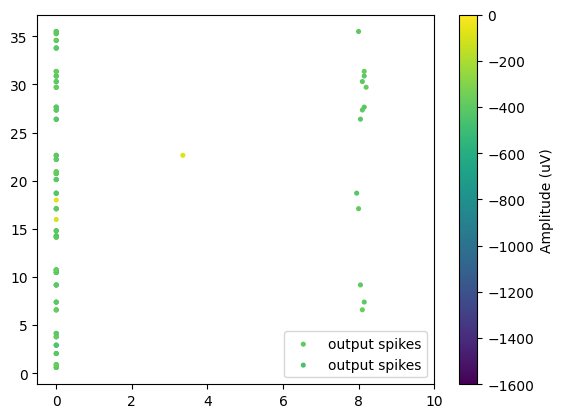

In [89]:

gain = 6.3
spikes = spikes_after_2
latency_before = latency_after_2

output_spikes = spikes[spikes[:, 0] == pre_extremum[0]]
output_before_amplitude_color = np.zeros(latency_before.shape[0], dtype=[('latency', 'f8'), ('spike time', 'f8'), ('amplitude', 'f8'), ('category', 'U10')])
output_before_amplitude_color['latency'] = latency_before['latency']
output_before_amplitude_color['spike time'] = latency_before['spike time'] /1000
output_before_amplitude_color['category'] = latency_before['category']
output_before_amplitude_color['amplitude'] = (np.array([output_spikes[output_spikes[:, 1] == spike_time, 2][0] for spike_time in latency_before['spike time']])*gain).tolist()
#remove all rows in latency_before where amplitude is > 1000
output_before_amplitude_color = output_before_amplitude_color[((output_before_amplitude_color['category'] == 'input') & (output_before_amplitude_color['amplitude'] < -200) & (output_before_amplitude_color['amplitude'] > -700)) | (output_before_amplitude_color['category'] == 'output')]
#plot the output_before_amplitude_color with amplitude as color
output_only = output_before_amplitude_color[output_before_amplitude_color['category'] == 'output']
input_only = output_before_amplitude_color[output_before_amplitude_color['category'] == 'input']
scatter_2 = plt.scatter(
    output_only['latency'], 
    output_only['spike time'], 
    s=7, 
    c=output_only['amplitude'], 
    cmap='viridis', 
    vmin=-1600,  # Set minimum value for color scale
    vmax=0,      # Set maximum value for color scale
    label='output spikes'
)
scatter = plt.scatter(
    input_only['latency'], 
    input_only['spike time'], 
    s=7, 
    c=input_only['amplitude'], 
    cmap='viridis', 
    vmin=-1600,  # Set minimum value for color scale
    vmax=0,      # Set maximum value for color scale
    label='output spikes'
)





# Add colorbar using the same scatter object
cbar = plt.colorbar(scatter)
cbar.set_label('Amplitude (uV)')
plt.xlim(-0.50,10)
plt.legend()

In [53]:
latency_week_after = plot_latency_and_location_simple_both_plots(OUTPUT_PATH, filename_week_after, unit_to_el, pre_extremum, post_extremum, unit_pre, unit_post, spikes_week_after)

2025-05-09 10:23:42,279 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-05-09 10:23:42,383 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-05-09 10:23:42,384 Writing TrueType font.


2025-05-09 10:38:55,659 locator: <matplotlib.ticker.AutoLocator object at 0x7fb68733b690>


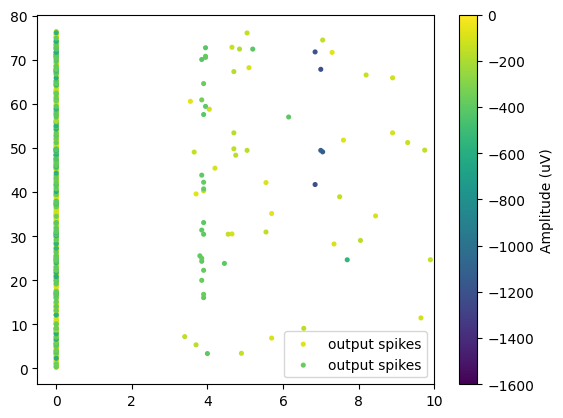

In [90]:

gain = 6.3
spikes = spikes_week_after
latency_before = latency_week_after

output_spikes = spikes[spikes[:, 0] == pre_extremum[0]]
output_before_amplitude_color = np.zeros(latency_before.shape[0], dtype=[('latency', 'f8'), ('spike time', 'f8'), ('amplitude', 'f8'), ('category', 'U10')])
output_before_amplitude_color['latency'] = latency_before['latency']
output_before_amplitude_color['spike time'] = latency_before['spike time'] /1000
output_before_amplitude_color['category'] = latency_before['category']
output_before_amplitude_color['amplitude'] = (np.array([output_spikes[output_spikes[:, 1] == spike_time, 2][0] for spike_time in latency_before['spike time']])*gain).tolist()
#remove all rows in latency_before where amplitude is > 1000
#output_before_amplitude_color = output_before_amplitude_color[output_before_amplitude_color['amplitude'] > -1500]
#plot the output_before_amplitude_color with amplitude as color
output_before_amplitude_color = output_before_amplitude_color[((output_before_amplitude_color['category'] == 'input') & (output_before_amplitude_color['amplitude'] < -200) & (output_before_amplitude_color['amplitude'] > -700)) | (output_before_amplitude_color['category'] == 'output')]
#plot the output_before_amplitude_color with amplitude as color
output_only = output_before_amplitude_color[output_before_amplitude_color['category'] == 'output']
input_only = output_before_amplitude_color[output_before_amplitude_color['category'] == 'input']
scatter_2 = plt.scatter(
    output_only['latency'], 
    output_only['spike time'], 
    s=7, 
    c=output_only['amplitude'], 
    cmap='viridis', 
    vmin=-1600,  # Set minimum value for color scale
    vmax=0,      # Set maximum value for color scale
    label='output spikes'
)
scatter = plt.scatter(
    input_only['latency'], 
    input_only['spike time'], 
    s=7, 
    c=input_only['amplitude'], 
    cmap='viridis', 
    vmin=-1600,  # Set minimum value for color scale
    vmax=0,      # Set maximum value for color scale
    label='output spikes'
)





# Add colorbar using the same scatter object
cbar = plt.colorbar(scatter)
cbar.set_label('Amplitude (uV)')
plt.xlim(-0.50,10)
plt.legend()

Separate before latency plot

2025-05-19 18:03:43,569 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-05-19 18:03:43,580 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-05-19 18:03:43,580 Writing TrueType font.


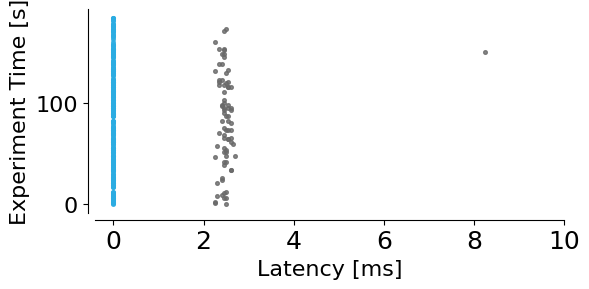

In [101]:
# Create figure and axes with specific padding
fig, ax = plt.subplots(figsize=(6,3))

# Set space between axes and plot area
plt.subplots_adjust(left=0., right=0.95, bottom=0.15, top=0.95)

input_color = '#2bace2'
output_color = 'dimgray'

# Plot latency_before data
input_before = lat_before[lat_before['category'] == 'input']
output_before = lat_before[lat_before['category'] == 'output']

# Use plt.scatter directly

plt.scatter(output_before['latency'], output_before['spike time'] / 1000, s=7, color=output_color, alpha=0.8)
plt.scatter(input_before['latency'], input_before['spike time'] / 1000, s=7, color=input_color, alpha=0.8)
# Set labels
plt.xlabel('Latency [ms]', fontsize=16)
plt.ylabel('Experiment Time [s]', fontsize=16)

# Adjust spines to create space between axes and plot area
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))

# Turn off the top and right spines to match your example
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.xticks(np.arange(0, 11, 2), fontsize = 18)

# Make the layout compact
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, f'Latency_plot_{filename[:-3]}_pair.png'), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(OUTPUT_PATH, f'Latency_plot_{filename[:-3]}_pair.pdf'), dpi=300, bbox_inches='tight')

# Show plot
plt.show()

Combined after and after_2 latency plot

2025-05-08 10:38:08,891 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-05-08 10:38:08,898 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-05-08 10:38:08,898 Writing TrueType font.


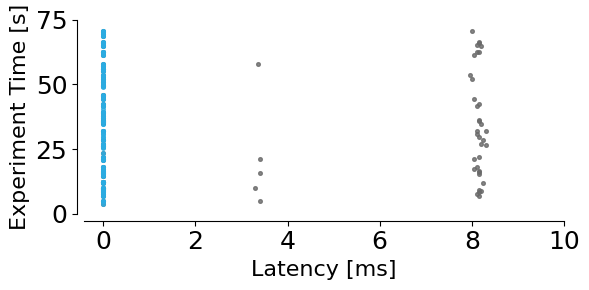

In [53]:
# Create figure and axes with specific padding
fig, ax = plt.subplots(figsize=(6,3))

# Set space between axes and plot area
plt.subplots_adjust(left=0., right=0.95, bottom=0.15, top=0.95)

input_color = '#2bace2'
output_color = 'dimgray'

# Plot latency_before data
input_after = latency_after[latency_after['category'] == 'input']
output_after = latency_after[latency_after['category'] == 'output']

# Use plt.scatter directly
plt.scatter(output_after['latency'], output_after['spike time'] / 1000, s=7, color=output_color, alpha=0.8)
plt.scatter(input_after['latency'], input_after['spike time'] / 1000, s=7, color=input_color, alpha=0.8)


# Plot latency_after data (add 5 min = 300000 ms)
input_after_2 = latency_after_2[latency_after_2['category'] == 'input']
output_after_2 = latency_after_2[latency_after_2['category'] == 'output']

plt.scatter(output_after_2['latency'], output_after_2['spike time'] / 1000+35, s=7, color=output_color, alpha=0.8)
plt.scatter(input_after_2['latency'], input_after_2['spike time'] / 1000+35, s=7, color=input_color, alpha=0.8)


# Set labels
plt.xlabel('Latency [ms]', fontsize=16)
plt.ylabel('Experiment Time [s]', fontsize=16)

# Adjust spines to create space between axes and plot area
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))

# Turn off the top and right spines to match your example
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.xticks(np.arange(0, 11, 2), fontsize = 18)
plt.yticks(np.arange(0, 100, 25), fontsize = 18)


# Make the layout compact
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, f'Latency_plot_{filename_after[:-3]}_and_{filename_after_2}_pair.png'), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(OUTPUT_PATH, f'Latency_plot_{filename_after[:-3]}_and_{filename_after_2}_pair.pdf'), dpi=300, bbox_inches='tight')


# Show plot
plt.show()

Seprate week after latency plot

2025-05-20 16:11:16,669 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-05-20 16:11:16,677 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-05-20 16:11:16,678 Writing TrueType font.


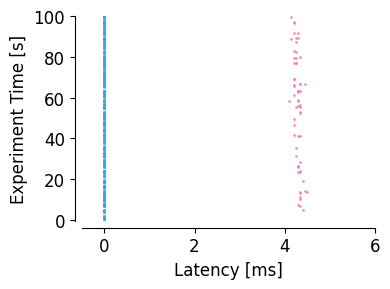

In [28]:
# Create figure and axes with specific padding
fig, ax = plt.subplots(figsize=(4,3))

latency_week_after = lat_before

# Set space between axes and plot area
plt.subplots_adjust(left=0., right=0.95, bottom=0.15, top=0.95)

input_color = '#2bace2'
output_color = '#f281b2'

# Plot latency_before data

input_week_after = latency_week_after[latency_week_after['category'] == 'input']
output_week_after = latency_week_after[latency_week_after['category'] == 'output']

# Use plt.scatter directly


plt.scatter(output_week_after['latency'], output_week_after['spike time'] / 1000, s=1, color=output_color, alpha=0.8)
plt.scatter(input_week_after['latency'], input_week_after['spike time'] / 1000, s=1, color=input_color, alpha=0.8)
# Set labels
plt.xlabel('Latency [ms]', fontsize=12)
plt.ylabel('Experiment Time [s]', fontsize=12)
plt.ylim(-0.5, 100)
plt.xlim(-0.5, 6)

# Adjust spines to create space between axes and plot area
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))

# Turn off the top and right spines to match your example
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
#plt.xticks(np.arange(0, 11, 2), fontsize = 12)
#plt.yticks(np.arange(0, 400, 100), fontsize = 12)

# Make the layout compact
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, f'Latency_plot_before_stimulation'), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(OUTPUT_PATH, f'Latency_plot_before_stimulation.pdf'), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(OUTPUT_PATH, f'Latency_plot_before_stimulation.svg'), dpi=300, bbox_inches='tight')


# Show plot
plt.show()

2025-05-20 16:11:17,172 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-05-20 16:11:17,181 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-05-20 16:11:17,181 Writing TrueType font.


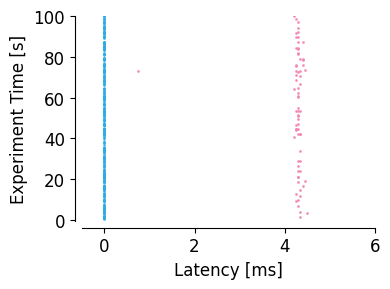

In [29]:
# Create figure and axes with specific padding
fig, ax = plt.subplots(figsize=(4,3))

latency_week_after = lat_after

# Set space between axes and plot area
plt.subplots_adjust(left=0., right=0.95, bottom=0.15, top=0.95)

input_color = '#2bace2'
output_color = '#f281b2'

# Plot latency_before data

input_week_after = latency_week_after[latency_week_after['category'] == 'input']
output_week_after = latency_week_after[latency_week_after['category'] == 'output']

# Use plt.scatter directly


plt.scatter(output_week_after['latency'], output_week_after['spike time'] / 1000, s=1, color=output_color, alpha=0.8)
plt.scatter(input_week_after['latency'], input_week_after['spike time'] / 1000, s=1, color=input_color, alpha=0.8)
# Set labels
plt.xlabel('Latency [ms]', fontsize=12)
plt.ylabel('Experiment Time [s]', fontsize=12)
plt.ylim(-0.50,100)
plt.xlim(-0.5, 6)


# Adjust spines to create space between axes and plot area
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))

# Turn off the top and right spines to match your example
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
#plt.xticks(np.arange(0, 11, 2), fontsize = 12)
#plt.yticks(np.arange(0, 400, 100), fontsize = 12)

# Make the layout compact
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, f'Latency_plot_after_stimulation'), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(OUTPUT_PATH, f'Latency_plot_after_stimulation.pdf'), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(OUTPUT_PATH, f'Latency_plot_after_stimulation.svg'), dpi=300, bbox_inches='tight')
# Show plot
plt.show()

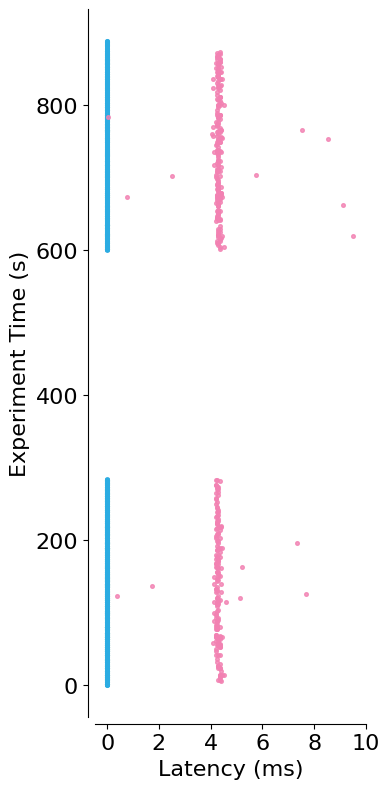

In [190]:
import matplotlib.pyplot as plt
import numpy as np

# I'm assuming you already have your three arrays: latency_before, latency_after, and latency_after_2

# Create figure and axes with specific padding
fig, ax = plt.subplots(figsize=(4,8))

# Set space between axes and plot area
plt.subplots_adjust(left=0., right=0.95, bottom=0.15, top=0.95)

input_color = '#2bace2'
output_color = '#f281b2'

# Plot latency_before data
input_before = lat_before[lat_before['category'] == 'input']
output_before = lat_before[lat_before['category'] == 'output']

# Use plt.scatter directly
plt.scatter(input_before['latency'], input_before['spike time'] / 1000, s=7, color=input_color, alpha=0.8)
plt.scatter(output_before['latency'], output_before['spike time'] / 1000, s=7, color=output_color, alpha=0.8)

# Plot latency_after data (add 5 min = 300000 ms)
input_after = lat_after[lat_after['category'] == 'input']
output_after = lat_after[lat_after['category'] == 'output']

plt.scatter(input_after['latency'], input_after['spike time'] / 1000+600, s=7, color=input_color, alpha=0.8)
plt.scatter(output_after['latency'], output_after['spike time'] / 1000+600, s=7, color=output_color, alpha=0.8)



# Set x-axis ticks to show only even numbers (0,2,4,6,8,10)
plt.xticks(np.arange(0, 11, 2), fontsize = 18)


# Set axis limits based on your data (mirroring your example image)
#plt.xlim(-0.5, 10.5)
#plt.ylim(-5, 105)

# Set labels
plt.xlabel('Latency (ms)', fontsize=16)
plt.ylabel('Experiment Time (s)', fontsize=16)

# Adjust spines to create space between axes and plot area
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))

# Turn off the top and right spines to match your example
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Make the layout compact
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, f'Latency_plot_{filename[:-3]}_pair.png'), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(OUTPUT_PATH, f'Latency_plot_{filename[:-3]}_pair.svg'), dpi=300, bbox_inches='tight')

# Show plot
plt.show()

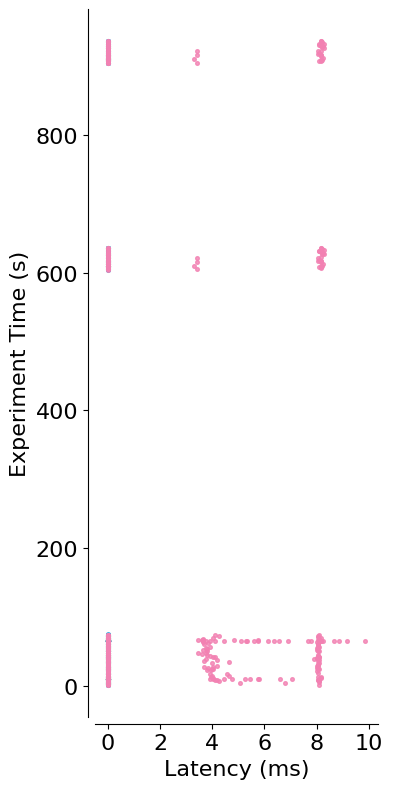

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# I'm assuming you already have your three arrays: latency_before, latency_after, and latency_after_2

# Create figure and axes with specific padding
fig, ax = plt.subplots(figsize=(4,8))

# Set space between axes and plot area
plt.subplots_adjust(left=0., right=0.95, bottom=0.15, top=0.95)

input_color = '#2bace2'
output_color = '#f281b2'

# Plot latency_before data
input_before = latency_before[latency_before['category'] == 'input']
output_before = latency_before[latency_before['category'] == 'output']

# Use plt.scatter directly
plt.scatter(input_before['latency'], input_before['spike time'] / 1000, s=7, color=input_color, alpha=0.8)
plt.scatter(output_before['latency'], output_before['spike time'] / 1000, s=7, color=output_color, alpha=0.8)

# Plot latency_after data (add 5 min = 300000 ms)
input_after = latency_after[latency_after['category'] == 'input']
output_after = latency_after[latency_after['category'] == 'output']

plt.scatter(input_after['latency'], input_after['spike time'] / 1000+600, s=7, color=input_color, alpha=0.8)
plt.scatter(output_after['latency'], output_after['spike time'] / 1000+600, s=7, color=output_color, alpha=0.8)

# Plot latency_after_2 data (add 10 min = 600000 ms)
input_after_2 = latency_after_2[latency_after_2['category'] == 'input']
output_after_2 = latency_after_2[latency_after_2['category'] == 'output']

plt.scatter(input_after_2['latency'], input_after_2['spike time'] / 1000+900, s=7, color=input_color, alpha=0.8)
plt.scatter(output_after_2['latency'], output_after_2['spike time'] / 1000+900, s=7, color=output_color, alpha=0.8)

# Set x-axis ticks to show only even numbers (0,2,4,6,8,10)
plt.xticks(np.arange(0, 11, 2), fontsize = 18)


# Set axis limits based on your data (mirroring your example image)
#plt.xlim(-0.5, 10.5)
#plt.ylim(-5, 105)

# Set labels
plt.xlabel('Latency (ms)', fontsize=16)
plt.ylabel('Experiment Time (s)', fontsize=16)

# Adjust spines to create space between axes and plot area
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))

# Turn off the top and right spines to match your example
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Make the layout compact
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, f'Latency_plot_{filename[:-3]}_pair.png'), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(OUTPUT_PATH, f'Latency_plot_{filename[:-3]}_pair.svg'), dpi=300, bbox_inches='tight')

# Show plot
plt.show()

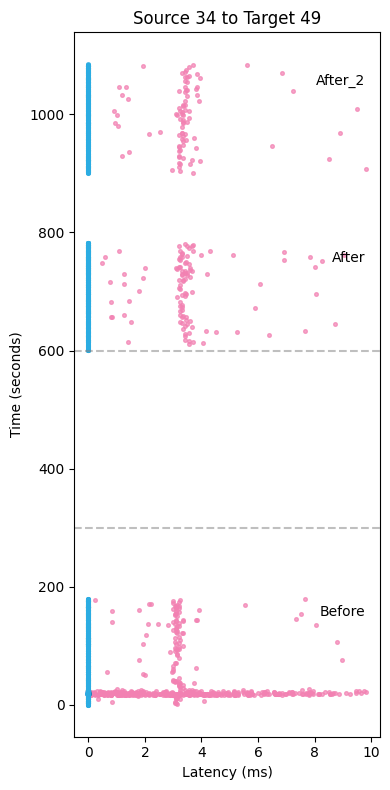

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# I'm assuming you already have your three arrays: latency_before, latency_after, and latency_after_2
# The code below shows how to plot them all on the same figure

fig, ax = plt.subplots(figsize=(4, 8))

# Colors for consistency
input_color = '#2bace2'
output_color = '#f281b2'

# Plot latency_before data
input_before = latency_before[latency_before['category'] == 'input']
output_before = latency_before[latency_before['category'] == 'output']
ax.scatter(output_before['latency'], output_before['spike time'] / 1000, s=7, color=output_color, alpha=0.7)
ax.scatter(input_before['latency'], input_before['spike time'] / 1000, s=7, color=input_color, alpha=0.7)

# Plot latency_after data (add 5 min = 300000 ms)
input_after = latency_after[latency_after['category'] == 'input']
output_after = latency_after[latency_after['category'] == 'output']
ax.scatter(output_after['latency'], output_after['spike time'] / 1000 + 600, s=7,  color=output_color, alpha=0.7)
ax.scatter(input_after['latency'], input_after['spike time'] / 1000 + 600, s=7, color=input_color, alpha=0.7)

# Plot latency_after_2 data (add 10 min = 600000 ms)
input_after_2 = latency_after_2[latency_after_2['category'] == 'input']
output_after_2 = latency_after_2[latency_after_2['category'] == 'output']
ax.scatter(output_after_2['latency'], output_after_2['spike time'] / 1000 + 900, s=7, color=output_color, alpha=0.7)
ax.scatter(input_after_2['latency'], input_after_2['spike time'] / 1000 + 900, s=7, color=input_color, alpha=0.7)

# Add horizontal lines to separate the periods
y_min, y_max = ax.get_ylim()
ax.axhline(y=300, color='gray', linestyle='--', alpha=0.5)  # Line at 5 min = 300 sec
ax.axhline(y=600, color='gray', linestyle='--', alpha=0.5)  # Line at 10 min = 600 sec

# Set labels and title
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('Time (seconds)')
ax.set_title(f"Source {unit_pre} to Target {unit_post}")

# Create a custom legend to avoid duplicates
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Add annotations to identify time periods
ax.text(ax.get_xlim()[1] * 0.95, 150, 'Before', horizontalalignment='right')
ax.text(ax.get_xlim()[1] * 0.95, 750, 'After', horizontalalignment='right')
ax.text(ax.get_xlim()[1] * 0.95, 1050, 'After_2', horizontalalignment='right')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def calculate_synaptic_probability(data, time_bin_size=30):
    """
    Calculate synaptic probability over time bins.
    
    Parameters:
    - data: Dictionary containing 'lag' and 'latency_extremum'
    - time_bin_size: Size of time bins in ms (default: 30)
    
    Returns:
    - time_bins: Array of time bin centers
    - probabilities: Array of synaptic probabilities for each time bin
    - prob_changes: Array of changes in probability between consecutive time bins
    """
    lag = data['lag']
    latency = data['latency_extremum']
    
    # Extract all spike times
    all_spike_times = latency['spike time']
    
    # Determine the range of time bins
    min_time = np.min(all_spike_times)
    max_time = np.max(all_spike_times)
    
    # Create time bins
    time_edges = np.arange(min_time, max_time + time_bin_size, time_bin_size)
    time_bins = (time_edges[:-1] + time_edges[1:]) / 2  # Centers of bins
    
    probabilities = []
    
    # For each time bin, calculate synaptic probability
    for i in range(len(time_bins)):
        bin_start = time_edges[i]
        bin_end = time_edges[i+1]
        
        # Filter latency data for current time bin
        time_mask = (all_spike_times >= bin_start) & (all_spike_times < bin_end)
        bin_latency = latency[time_mask]
        
        if len(bin_latency) == 0:
            # No spikes in this bin
            probabilities.append(0)
            continue
        
        # Filter for output spikes
        data_output = bin_latency[bin_latency['category'] == 'output']
        
        # Filter for latency within lag ± 1 ms
        latency_filtered = data_output[(data_output['latency'] >= lag - 1) & 
                                     (data_output['latency'] <= lag + 1)]
        
        # Get input spikes in this bin
        input_spikes = bin_latency[bin_latency['category'] == 'input']
        input_spike_counts = len(input_spikes)
        
        if input_spike_counts == 0:
            # No input spikes in this bin
            probabilities.append(0)
            continue
        
        # Count output spikes that correspond to input spikes
        output_spike_counts = np.sum(np.isin(latency_filtered['input spike'], 
                                          input_spikes['input spike']))
        
        # Calculate probability
        probability = output_spike_counts / input_spike_counts
        probabilities.append(probability)
    
    probabilities = np.array(probabilities)
    
    # Calculate changes in probability
    prob_changes = np.diff(probabilities, prepend=probabilities[0])
    
    return time_bins, probabilities, prob_changes

def plot_synaptic_probability(time_bins, probabilities, prob_changes):
    """Plot synaptic probability over time and its change."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Plot synaptic probability over time
    ax1.plot(time_bins, probabilities, 'b-', linewidth=2)
    ax1.set_ylabel('Synaptic Probability')
    ax1.set_title('Synaptic Probability Over Time')
    ax1.grid(True)
    
    # Plot change in synaptic probability over time
    ax2.plot(time_bins, prob_changes, 'r-', linewidth=2)
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('Change in Probability')
    ax2.set_title('Change in Synaptic Probability Over Time')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()





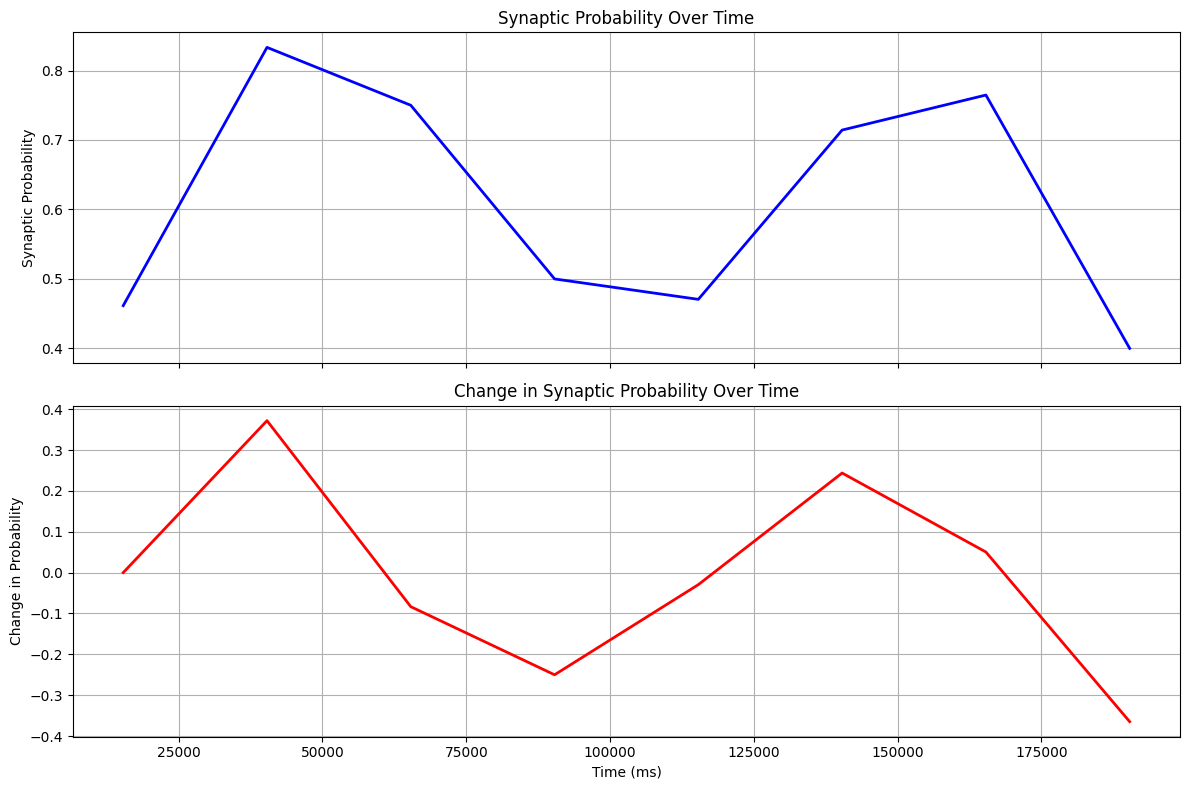

In [53]:
#res[31]['latency_extremum']
data = res[31]
# Calculate synaptic probability over time
time_bins, probabilities, prob_changes = calculate_synaptic_probability(data, time_bin_size=25000)

# Plot the results
plot_synaptic_probability(time_bins, probabilities, prob_changes)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def calculate_synaptic_probability(latency, lag, time_bin_size=30):
    """
    Calculate synaptic probability over time bins.
    
    Parameters:
    - data: Dictionary containing 'lag' and 'latency_extremum'
    - time_bin_size: Size of time bins in ms (default: 30)
    
    Returns:
    - time_bins: Array of time bin centers (in seconds)
    - probabilities: Array of synaptic probabilities for each time bin
    - prob_changes: Array of changes in probability between consecutive time bins
    """
    # Extract all spike times
    all_spike_times = latency['spike time']
    
    # Determine the range of time bins
    min_time = np.min(all_spike_times)
    max_time = np.max(all_spike_times)
    
    # Create time bins
    time_edges = np.arange(min_time, max_time + time_bin_size, time_bin_size)
    time_bins = (time_edges[:-1] + time_edges[1:]) / 2  # Centers of bins
    
    # Convert time bins from ms to seconds
    time_bins_seconds = time_bins / 1000.0
    
    probabilities = []
    
    # For each time bin, calculate synaptic probability
    for i in range(len(time_bins)):
        bin_start = time_edges[i]
        bin_end = time_edges[i+1]
        
        # Filter latency data for current time bin
        time_mask = (all_spike_times >= bin_start) & (all_spike_times < bin_end)
        bin_latency = latency[time_mask]
        
        if len(bin_latency) == 0:
            # No spikes in this bin
            probabilities.append(0)
            continue
        
        # Filter for output spikes
        data_output = bin_latency[bin_latency['category'] == 'output']
        
        # Filter for latency within lag ± 1 ms
        latency_filtered = data_output[(data_output['latency'] >= lag - 1) & 
                                     (data_output['latency'] <= lag + 1)]
        
        # Get input spikes in this bin
        input_spikes = bin_latency[bin_latency['category'] == 'input']
        input_spike_counts = len(input_spikes)
        
        if input_spike_counts == 0:
            # No input spikes in this bin
            probabilities.append(0)
            continue
        
        # Count output spikes that correspond to input spikes
        output_spike_counts = np.sum(np.isin(latency_filtered['input spike'], 
                                          input_spikes['input spike']))
        
        # Calculate probability
        probability = output_spike_counts / input_spike_counts
        probabilities.append(probability)
    
    probabilities = np.array(probabilities)
    
    # Calculate changes in probability
    prob_changes = np.diff(probabilities, prepend=probabilities[0])
    
    return time_bins_seconds, probabilities, prob_changes

def plot_synaptic_probability(time_bins_seconds, probabilities, prob_changes):
    """Plot synaptic probability over time and its change."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Plot synaptic probability over time
    ax1.plot(time_bins_seconds, probabilities, 'b-', linewidth=2)
    ax1.set_ylabel('Synaptic Probability')
    ax1.set_title('Synaptic Probability Over Time')
    ax1.grid(True)
    
    # Plot change in synaptic probability over time
    ax2.plot(time_bins_seconds, prob_changes, 'r-', linewidth=2)
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Change in Probability')
    ax2.set_title('Change in Synaptic Probability Over Time')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()



In [49]:
#data['latency_extremum']
#filter only cateogry output
latency = latency_after
latency = latency[latency['category'] == 'output']
#calculate mean latency
mean_latency = np.mean(latency['latency'])
median_latency = np.median(latency['latency'])
mean_latency, median_latency

(3.6000001, 3.4)

In [56]:
data_te.keys()

dict_keys(['CHIP_ID', 'NW_ID', 'DIV', 'EXPERIMENT_DURATION', 'SPIKEMAT_EXTREMUM', 'SPIKEMAT', 'UNIT_TO_EL', 'BLANKING', 'UNIT_IDS', 'ENTROPY', 'LOCAL_ENTROPY', 'AIS', 'LOCAL_AIS', 'mTE', 'LOCAL_mTE', 'biTE', 'PID', 'CROSS_CORR_COEFF', 'validated_results'])

In [58]:
all_probabilities = []
all_prob_changes = []
for row in data_te['validated_results']:
    if row['validation'] == 'good':
        latency = row['latency_extremum']
        lag = row['lag']
        time_bins, probabilities, prob_changes = calculate_synaptic_probability(latency, lag, time_bin_size=25000)
        all_probabilities.append(probabilities)
        all_prob_changes.append(prob_changes)

all_probabilities = np.array(all_probabilities)
all_prob_changes = np.array(all_prob_changes)
#plot mean of all probabilities
mean_probabilities = np.mean(all_probabilities, axis=0)
mean_prob_changes = np.mean(all_prob_changes, axis=0)
#plot mean of all probabilities
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
# Plot synaptic probability over time
ax1.plot(time_bins, mean_probabilities, 'b-', linewidth=2)
ax1.set_ylabel('Synaptic Probability')
ax1.set_title('Mean Synaptic Probability Over Time')
ax1.grid(True)
# Plot change in synaptic probability over time
ax2.plot(time_bins, mean_prob_changes, 'r-', linewidth=2)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Change in Probability')
ax2.set_title('Mean Change in Synaptic Probability Over Time')
ax2.grid(True)
plt.tight_layout()
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

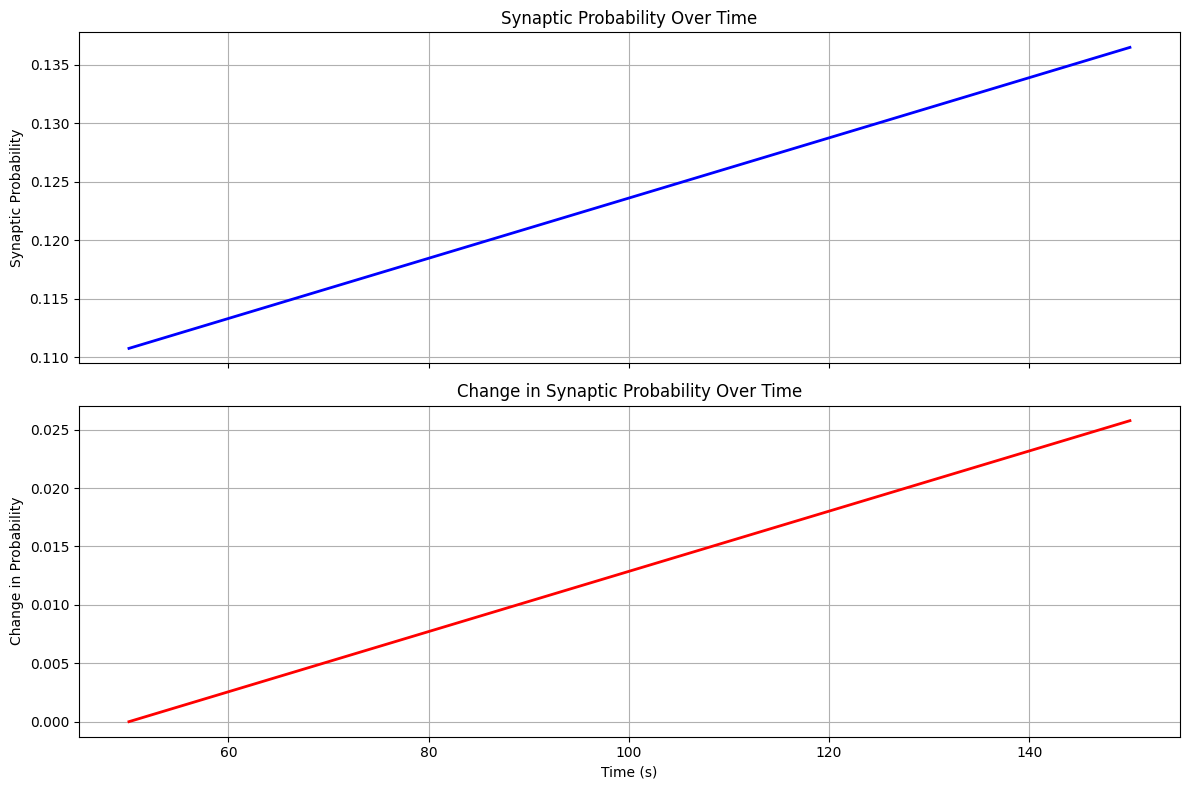

In [54]:
#res[31]['latency_extremum']

# Calculate synaptic probability over time
time_bins, probabilities, prob_changes = calculate_synaptic_probability(latency_after, median_latency,  time_bin_size=100000)

# Plot the results
plot_synaptic_probability(time_bins, probabilities, prob_changes)

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def calculate_synaptic_probability(latency, lag, time_bin_size=30):
    """
    Calculate synaptic probability over time bins.
    
    Parameters:
    - latency: Dictionary containing 'spike time' and other data
    - lag: The lag value
    - time_bin_size: Size of time bins in ms (default: 30)
    
    Returns:
    - time_bins: Array of time bin centers (in seconds)
    - probabilities: Array of synaptic probabilities for each time bin
    - prob_changes: Array of changes in probability between consecutive time bins
    """
    # Extract all spike times
    all_spike_times = latency['spike time']
    
    # Determine the range of time bins
    min_time = np.min(all_spike_times)
    max_time = np.max(all_spike_times)
    
    # Create time bins
    time_edges = np.arange(min_time, max_time + time_bin_size, time_bin_size)
    time_bins = (time_edges[:-1] + time_edges[1:]) / 2  # Centers of bins
    
    # Convert time bins from ms to seconds
    time_bins_seconds = time_bins / 1000.0
    
    probabilities = []
    
    # For each time bin, calculate synaptic probability
    for i in range(len(time_bins)):
        bin_start = time_edges[i]
        bin_end = time_edges[i+1]
        
        # Filter latency data for current time bin
        time_mask = (all_spike_times >= bin_start) & (all_spike_times < bin_end)
        bin_latency = latency[time_mask]
        
        if len(bin_latency) == 0:
            # No spikes in this bin
            probabilities.append(0)
            continue
        
        # Filter for output spikes
        data_output = bin_latency[bin_latency['category'] == 'output']
        
        # Filter for latency within lag ± 1 ms
        latency_filtered = data_output[(data_output['latency'] >= lag - 1) & 
                                     (data_output['latency'] <= lag + 1)]
        
        # Get input spikes in this bin
        input_spikes = bin_latency[bin_latency['category'] == 'input']
        input_spike_counts = len(input_spikes)
        
        if input_spike_counts == 0:
            # No input spikes in this bin
            probabilities.append(0)
            continue
        
        # Count output spikes that correspond to input spikes
        output_spike_counts = np.sum(np.isin(latency_filtered['input spike'], 
                                          input_spikes['input spike']))
        
        # Calculate probability
        probability = output_spike_counts / input_spike_counts
        probabilities.append(probability)
    
    probabilities = np.array(probabilities)
    
    # Calculate changes in probability
    prob_changes = np.diff(probabilities, prepend=probabilities[0])
    
    return time_bins_seconds, probabilities, prob_changes

# Approach 1: Using interpolation to align all time series to a common time axis
def interpolate_and_plot(data_te):
    all_time_bins = []
    all_probabilities = []
    all_prob_changes = []
    
    # First pass: collect all data
    for row in data_te['validated_results']:
        if row['validation'] == 'good':
            latency = row['latency_extremum']
            lag = row['lag']
            time_bins, probabilities, prob_changes = calculate_synaptic_probability(latency, lag, time_bin_size=25000)
            all_time_bins.append(time_bins)
            all_probabilities.append(probabilities)
            all_prob_changes.append(prob_changes)
    
    # Find global time range
    min_time = min([np.min(tb) for tb in all_time_bins])
    max_time = max([np.max(tb) for tb in all_time_bins])
    
    # Create a common time axis with a reasonable number of points
    num_points = 100  # Adjust as needed
    common_time_axis = np.linspace(min_time, max_time, num_points)
    
    # Interpolate each dataset to the common time axis
    interpolated_probs = []
    interpolated_changes = []
    
    for i in range(len(all_time_bins)):
        # Create interpolation functions
        f_prob = interp1d(all_time_bins[i], all_probabilities[i], 
                          bounds_error=False, fill_value=0)
        f_change = interp1d(all_time_bins[i], all_prob_changes[i], 
                           bounds_error=False, fill_value=0)
        
        # Interpolate to common time axis
        interpolated_probs.append(f_prob(common_time_axis))
        interpolated_changes.append(f_change(common_time_axis))
    
    # Convert to numpy arrays now that they all have the same shape
    interpolated_probs = np.array(interpolated_probs)
    interpolated_changes = np.array(interpolated_changes)
    
    # Calculate mean
    mean_probabilities = np.mean(interpolated_probs, axis=0)
    mean_prob_changes = np.mean(interpolated_changes, axis=0)
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Plot synaptic probability over time
    ax1.plot(common_time_axis, mean_probabilities, 'b-', linewidth=2)
    ax1.set_ylabel('Synaptic Probability')
    ax1.set_title('Mean Synaptic Probability Over Time')
    ax1.grid(True)
    
    # Plot change in synaptic probability over time
    ax2.plot(common_time_axis, mean_prob_changes, 'r-', linewidth=2)
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Change in Probability')
    ax2.set_title('Mean Change in Synaptic Probability Over Time')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Approach 2: Alternative method using masking (useful if interpolation isn't appropriate)
def mask_and_plot(data_te):
    all_data = []
    
    # Collect all data with their time bins
    for row in data_te['validated_results']:
        if row['validation'] == 'good':
            latency = row['latency_extremum']
            lag = row['lag']
            time_bins, probabilities, prob_changes = calculate_synaptic_probability(latency, lag, time_bin_size=25000)
            all_data.append((time_bins, probabilities, prob_changes))
    
    # Find common time range
    min_time = max([np.min(d[0]) for d in all_data])  # Latest start time
    max_time = min([np.max(d[0]) for d in all_data])  # Earliest end time
    
    # Create time bins within the common range
    bin_size = 0.025  # 25ms in seconds
    common_bins = np.arange(min_time, max_time + bin_size, bin_size)
    
    # Initialize arrays for summing
    sum_probs = np.zeros(len(common_bins))
    sum_changes = np.zeros(len(common_bins))
    counts = np.zeros(len(common_bins))
    
    # Process each dataset
    for time_bins, probs, changes in all_data:
        # Find indices that fall within common range
        valid_indices = (time_bins >= min_time) & (time_bins <= max_time)
        
        # Get valid data
        valid_times = time_bins[valid_indices]
        valid_probs = probs[valid_indices]
        valid_changes = changes[valid_indices]
        
        # Assign to nearest bin in common_bins
        for t, p, c in zip(valid_times, valid_probs, valid_changes):
            # Find closest bin
            bin_idx = np.argmin(np.abs(common_bins - t))
            
            # Add to sums
            sum_probs[bin_idx] += p
            sum_changes[bin_idx] += c
            counts[bin_idx] += 1
    
    # Calculate means, avoiding division by zero
    mask = counts > 0
    mean_probs = np.zeros_like(sum_probs)
    mean_changes = np.zeros_like(sum_changes)
    
    mean_probs[mask] = sum_probs[mask] / counts[mask]
    mean_changes[mask] = sum_changes[mask] / counts[mask]
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Plot synaptic probability over time
    ax1.plot(common_bins, mean_probs, 'b-', linewidth=2)
    ax1.set_ylabel('Synaptic Probability')
    ax1.set_title('Mean Synaptic Probability Over Time')
    ax1.grid(True)
    
    # Plot change in synaptic probability over time
    ax2.plot(common_bins, mean_changes, 'r-', linewidth=2)
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Change in Probability')
    ax2.set_title('Mean Change in Synaptic Probability Over Time')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()



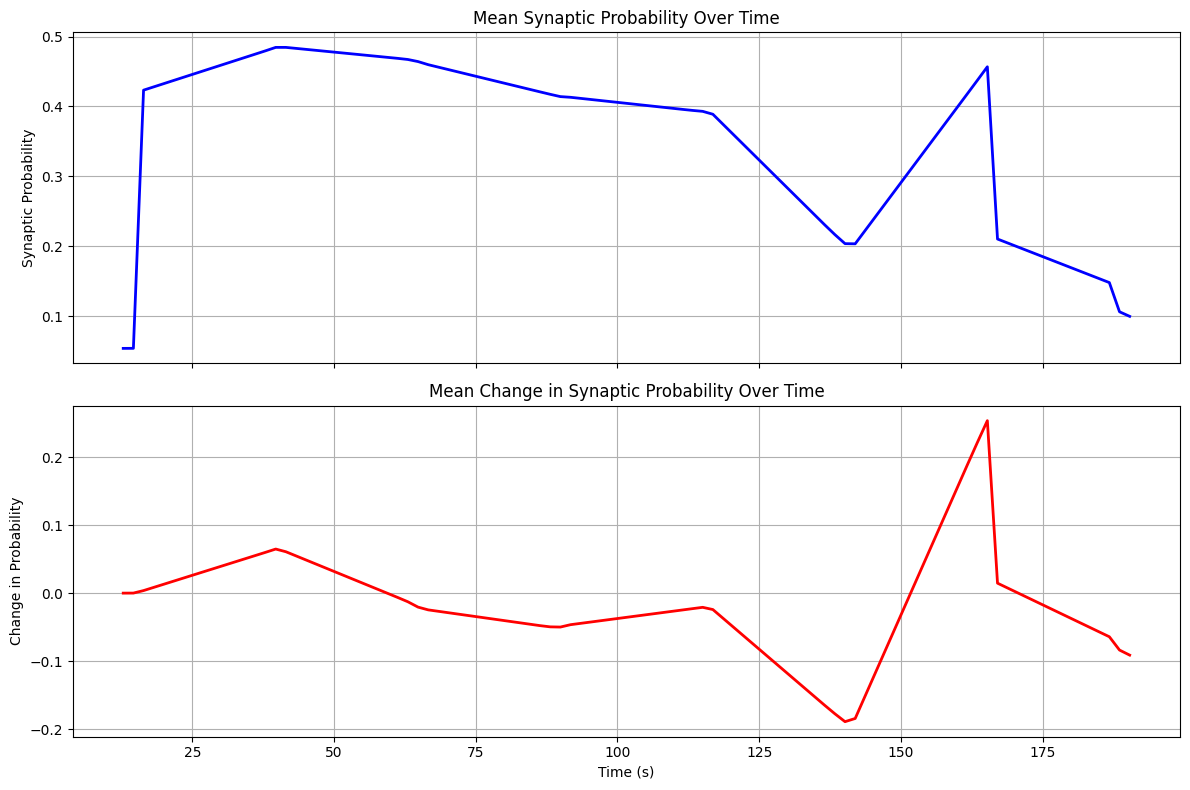

In [94]:
# Example usage:
interpolate_and_plot(data_te)  # Use this approach if interpolation is appropriate


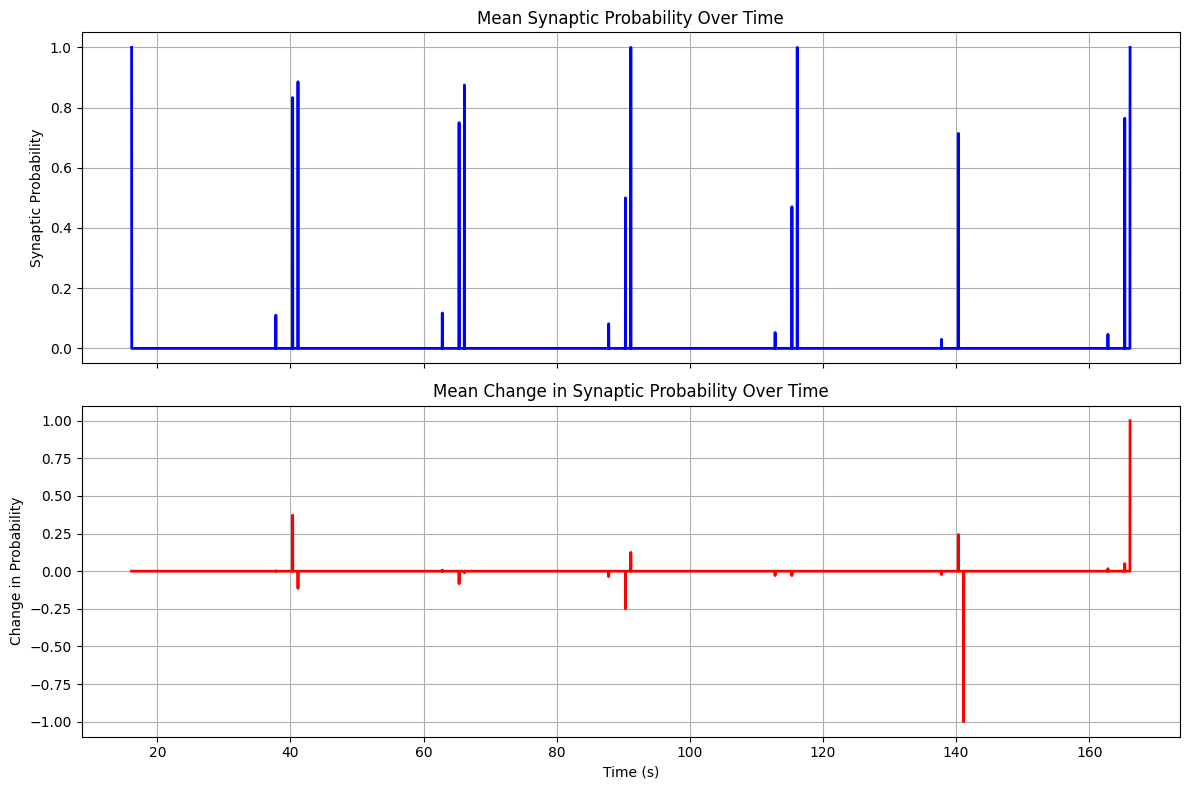

In [95]:
mask_and_plot(data_te)         # Use this approach if you prefer binning without interpolation